In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
GBBO_df = pd.read_csv('data/GBBO_data_set.csv')

In [3]:
#Remove those last 2 weird columns.
GBBO_df=GBBO_df.iloc[:,:16]

# Info on Dataset

In [4]:
GBBO_df.head()

,Season,Judge,Week Number,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Favorite,Least Favorite,Star Baker,Eliminated,Competed,Winner
0,Series 1,Mary,1,Cake,Annetha,F,30,0,2.0,0,1.0,0,0,0,1,0
1,Series 1,Mary,1,Cake,David,M,31,0,3.0,0,0.0,1,0,0,1,0
2,Series 1,Mary,1,Cake,Edd,M,24,0,1.0,0,0.0,0,0,0,1,1
3,Series 1,Mary,1,Cake,Jasminder,F,45,0,NaN,0,0.0,0,0,0,1,0
4,Series 1,Mary,1,Cake,Jonathan,M,25,0,9.0,0,0.0,0,0,0,1,0


In [5]:
GBBO_df.shape

(1256, 16)

In [6]:
GBBO_df.info()
#notice several missing values for Technical Rank.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 1256 non-null   object 
 1   Judge                  1256 non-null   object 
 2   Week Number            1256 non-null   int64  
 3   Week Name              1256 non-null   object 
 4   Baker                  1256 non-null   object 
 5   Gender                 1256 non-null   object 
 6   Age                    1256 non-null   int64  
 7   Signature Handshake    1256 non-null   int64  
 8   Technical Rank         771 non-null    float64
 9   Showstopper Handshake  1256 non-null   int64  
 10  Favorite               1256 non-null   float64
 11  Least Favorite         1256 non-null   int64  
 12  Star Baker             1256 non-null   int64  
 13  Eliminated             1256 non-null   int64  
 14  Competed               1256 non-null   int64  
 15  Winn

In [7]:
GBBO_df.describe()

,Week Number,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Favorite,Least Favorite,Star Baker,Eliminated,Competed,Winner
count,1256.000000,1256.000000,1256.000000,771.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,5.328025,37.449045,0.024682,4.837873,0.003185,0.164013,0.170382,0.078025,0.095541,0.619427,0.082803
std,2.830237,12.841254,0.155214,2.967953,0.056366,0.369896,0.376118,0.268319,0.294078,0.485721,0.275693
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,29.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,33.500000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.000000,46.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,10.000000,71.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's investigate those nulls for Technical Rank

In [8]:
GBBO_df[GBBO_df['Technical Rank'].isnull()]

,Season,Judge,Week Number,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Favorite,Least Favorite,Star Baker,Eliminated,Competed,Winner
3,Series 1,Mary,1,Cake,Jasminder,F,45,0,NaN,0,0.0,0,0,0,1,0
6,Series 1,Mary,1,Cake,Louise,F,44,0,NaN,0,0.0,1,0,1,1,0
7,Series 1,Mary,1,Cake,Mark,M,48,0,NaN,0,0.0,0,0,0,1,0
9,Series 1,Mary,1,Cake,Ruth,F,31,0,NaN,0,1.0,0,0,0,1,0
15,Series 1,Mary,2,Biscuits,Lea,F,51,0,NaN,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Series 11,Prue,10,Final,Mak,M,51,0,NaN,0,0.0,0,0,0,0,0
1251,Series 11,Prue,10,Final,Marc E,M,51,0,NaN,0,0.0,0,0,0,0,0
1252,Series 11,Prue,10,Final,Mark L,M,32,0,NaN,0,0.0,0,0,0,0,0
1254,Series 11,Prue,10,Final,Rowan,M,55,0,NaN,0,0.0,0,0,0,0,0


Upon further investigation, those nulls are just contestants that are no longer in the competition. We can probably remove them from the dataset but I will leave for now. 

In [9]:
list(GBBO_df.columns)

['Season',
 'Judge',
 'Week Number',
 'Week Name',
 'Baker',
 'Gender',
 'Age',
 'Signature Handshake',
 'Technical Rank',
 'Showstopper Handshake',
 'Favorite',
 'Least Favorite',
 'Star Baker',
 'Eliminated',
 'Competed',
 'Winner']

In [10]:
#I will now rename the columns to be a bit easier to program with
GBBO_df.rename(columns = {'Week Number':'Week_Number',
                          'Week Name':'Week_Name', 
                          'Signature Handshake':'Signature_Handshake',
                          'Technical Rank':'Technical_Rank',
                          'Showstopper Handshake':'Showstopper_Handshake',
                          'Least Favorite':'Least_Favorite',
                          'Star Baker':'Star_Baker'},
              inplace = True)

In [11]:
#Time to clean up columns for our modelling
GBBO_df.dtypes

Season                    object
Judge                     object
Week_Number                int64
Week_Name                 object
Baker                     object
Gender                    object
Age                        int64
Signature_Handshake        int64
Technical_Rank           float64
Showstopper_Handshake      int64
Favorite                 float64
Least_Favorite             int64
Star_Baker                 int64
Eliminated                 int64
Competed                   int64
Winner                     int64
dtype: object

Everything looks good here except for Gender. We will set this to dummy data for regression later on

In [12]:
Unique_Bakers = GBBO_df.Baker.nunique()
Gender_Counts = GBBO_df.Gender.value_counts()
Num_Sig_Handshakes = GBBO_df.Signature_Handshake.sum()
Num_Show_Handshakes = GBBO_df.Showstopper_Handshake.sum()
Youngest_Baker = GBBO_df.Age.min()
Oldest_Baker = GBBO_df.Age.max()

In [13]:
print(f' Over 11 seasons, The Great British Bake Off has seen {Unique_Bakers} bakers, \
{Gender_Counts[0]} of whom identify as female and {Gender_Counts[1]} whom identify as male. \
The series has also seen bakers range in ages from the youngest of {Youngest_Baker} years old, \
to the oldest of {Oldest_Baker} years old. Paul, one of the judges, loves to give out handshakes after exceptional bakes and \
we have seen {Num_Sig_Handshakes} number of handshakes after Signature Challenges, \
and {Num_Show_Handshakes} after Showstopper Challenges.')

 Over 11 seasons, The Great British Bake Off has seen 118 bakers, 644 of whom identify as female and 612 whom identify as male. The series has also seen bakers range in ages from the youngest of 17 years old, to the oldest of 71 years old. Paul, one of the judges, loves to give out handshakes after exceptional bakes and we have seen 31 number of handshakes after Signature Challenges, and 4 after Showstopper Challenges.


# Questions To Try and Solve

1) Do Gender, Age, Handshakes, Technical Score or being deemed favorite most lead to being star baker?

2) Do Gender, Age, Handshakes, Technical Score or being deemed least favorite most lead to being eliminated?

3) Does Star Baker correlate to winning the show? 

In [14]:
#Since Season 1 operated differently (no star baker, no handshakes,etc.) we will remove Season 1 from our DF
df = GBBO_df[GBBO_df.Season != 'Series 1'].copy()

In [15]:
df.Season.unique()

array(['Series 2', 'Series 3', 'Series 4', 'Series 5', 'Series 6',
       'Series 7', 'Series 8', 'Series 9', 'Series 10', 'Series 11'],
      dtype=object)

In [16]:
#Replace these with categorical values of 2-11 
df['Season'] = df['Season'].str.replace('Series', '').str.strip()

In [17]:
df.Season=df.Season.astype('int').astype('category')
df.Week_Number = df.Week_Number.astype('int').astype('category')

# Exploratory Data Analysis

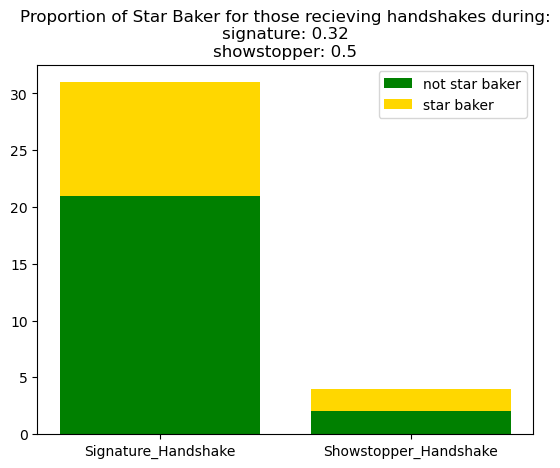

In [18]:
#Visualizing handshakes and star baker recipients on both signature bakes and showstoppers
plt.clf()

numsig =df.Signature_Handshake.sum()
starsig = df.loc[df.Star_Baker==1]['Signature_Handshake'].sum()
numshow = df.Showstopper_Handshake.sum()
starshow =df.loc[df.Star_Baker==1]['Showstopper_Handshake'].sum()

x= ['Signature_Handshake','Showstopper_Handshake']
y1= [numsig-starsig, numshow - starshow]
y2 = [starsig,starshow]
plt.bar(x,y1,color='green')
plt.bar(x,y2,bottom = y1,color='gold')
plt.legend(['not star baker','star baker'])
plt.title('Proportion of Star Baker for those recieving handshakes during:\n' +
          'signature: ' + str(round(starsig/numsig,2)) +
          '\nshowstopper: ' + str(starshow/numshow))
plt.show()      

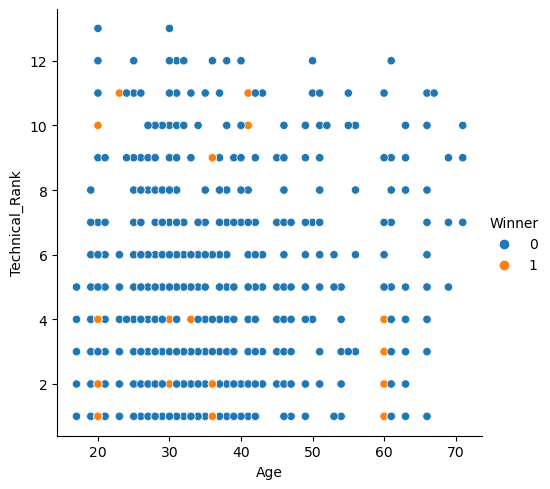

In [19]:
#Any relationship between Age and Technical_Rank?
sns.relplot(kind='scatter',data=df, x='Age',y='Technical_Rank',hue= 'Winner')
plt.show()

<Figure size 640x480 with 0 Axes>

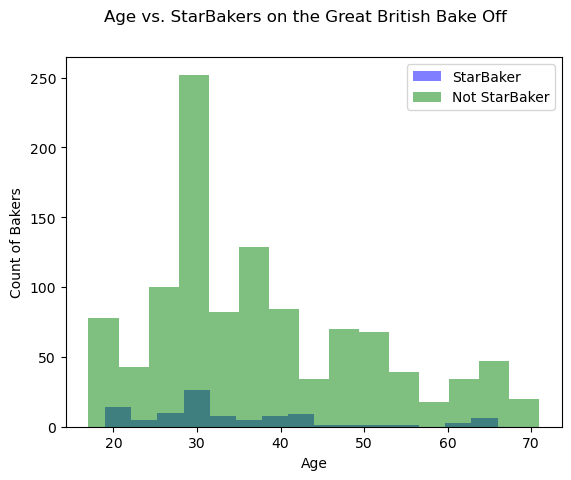

In [20]:
#Any relationship between Age and Star_Baker?
plt.clf()
fig, ax = plt.subplots()

ax.hist(df[df["Star_Baker"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="StarBaker")
ax.hist(df[df["Star_Baker"]==0]["Age"], bins=15, alpha=0.5, color="green", label="Not StarBaker")

ax.set_xlabel("Age")
ax.set_ylabel("Count of Bakers")

fig.suptitle("Age vs. StarBakers on the Great British Bake Off")

ax.legend()
plt.show()

Nothing super insightful here except that it seems that age does not aid star baker designation

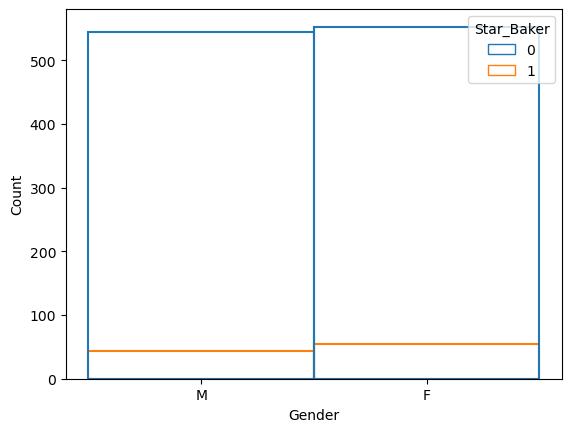

In [21]:
#Any visual discrepancies between gender and star baker?
_=sns.histplot(data=df,x='Gender',hue = "Star_Baker",fill=False)

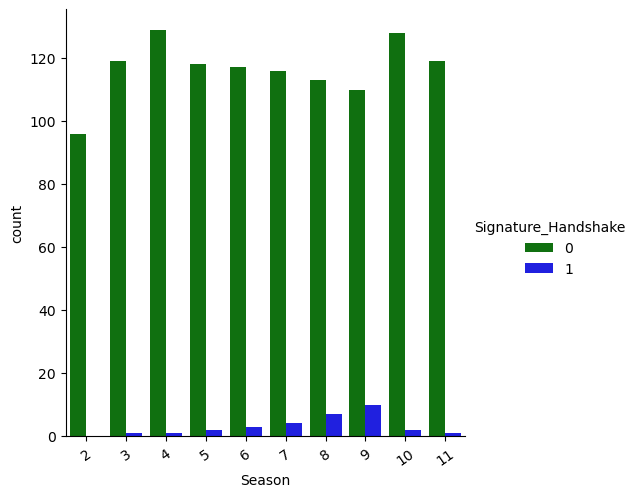

In [22]:
#Did signature handshakes increase during any season?
g=sns.catplot(x="Season", hue="Signature_Handshake", data=df, kind="count", 
            palette={1:"blue", 0:"green"})
g.set_xticklabels(rotation=35)

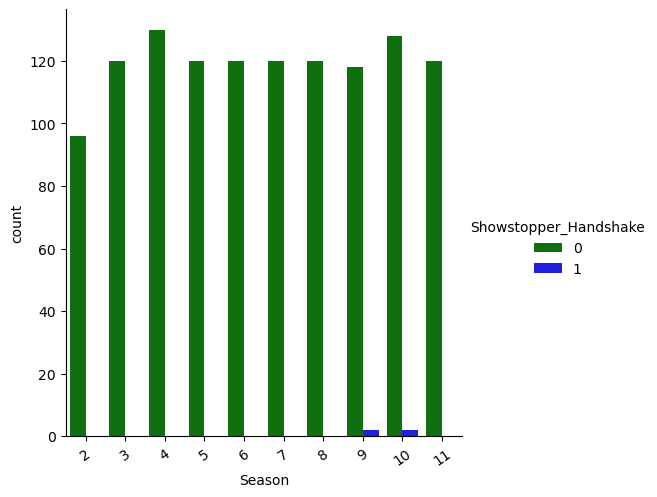

In [23]:
#Did Showstopper handshakes increase during any season?
g=sns.catplot(x="Season", hue="Showstopper_Handshake", data=df, kind="count", 
            palette={1:"blue", 0:"green"})
g.set_xticklabels(rotation=35)

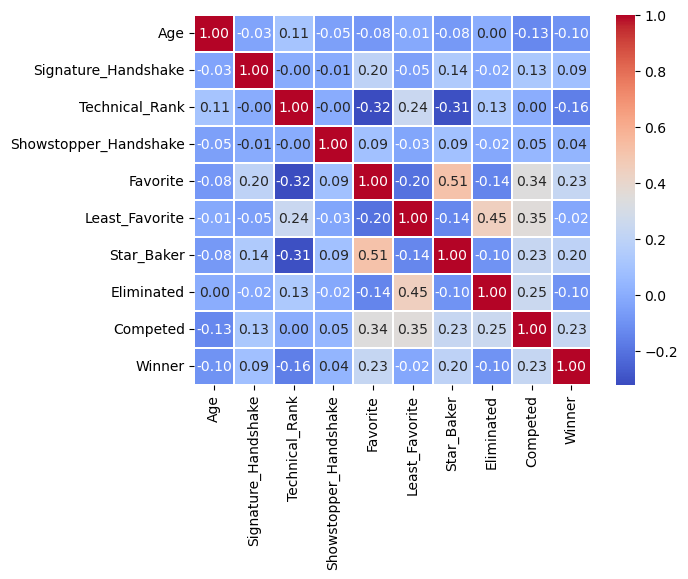

In [24]:
#Lets look for correlations between all the catagories
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt='.2f',linewidths=.05)
plt.show()

-Star_Baker and Favorite seem promising
-Least_Favorite and Eliminated seem promising
-Favorite/Least_Favorite are pretty correlated with Competed. This makes sense as the longer the baker is in the competition, the more likely it is that they'll recieve a favorite/least favorite designation



# Bring in the Challenges DF

In [25]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-10-25/challenges.csv'

In [26]:
challenges = pd.read_csv(url)

In [27]:
#remove series 1 to match our existing DF
challenges=challenges[challenges.series != 1]

In [28]:
#Change col labels of the challenges dataset
challenges.rename(columns={"series":"Season","episode":"Week_Number","baker":"Baker"},inplace=True)

In [29]:
display(df.dtypes)
display(challenges.dtypes)

Season                   category
Judge                      object
Week_Number              category
Week_Name                  object
Baker                      object
Gender                     object
Age                         int64
Signature_Handshake         int64
Technical_Rank            float64
Showstopper_Handshake       int64
Favorite                  float64
Least_Favorite              int64
Star_Baker                  int64
Eliminated                  int64
Competed                    int64
Winner                      int64
dtype: object

Season           int64
Week_Number      int64
Baker           object
result          object
signature       object
technical      float64
showstopper     object
dtype: object

In [30]:
#Brenden's name is spelled incorrectly. Should be 'Brendan'
df.Baker.replace('Brenden','Brendan',inplace=True)

In [31]:
#Challenges only has data for the seasons 2-10 while our main df goes to season 11. I'll drop season 11 from our main df. 

df= df.loc[df.Season != 11]

df.Season.unique()

[2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [2, 3, 4, 5, ..., 8, 9, 10, 11]

In [32]:
#I will merge the two dataframes together on Season, Week_Name, and Baker. So the dtypes must be the same
challenges.Season=challenges.Season.astype('category')
challenges.Week_Number=challenges.Week_Number.astype('category')
final_df = pd.merge(df,challenges,how = 'left', on=['Season','Week_Number','Baker'])

In [33]:
#drop challenges.result column & technical column due to redundancy
#drop judge column since Mary won't be a judge moving forward 
final_df.drop(columns=['result','technical','Judge'],inplace=True)

# Dealing with final null values

Lets remove all rows of legacy bakers (where they've been eliminated already)

In [68]:
final_df.isnull().sum()

Season                    0
Week_Number               0
Week_Name                 0
Baker                     0
Gender                    0
Age                       0
Signature_Handshake       0
Technical_Rank            0
Showstopper_Handshake     0
Favorite                  0
Least_Favorite            0
Star_Baker                0
Eliminated                0
Competed                  0
Winner                    0
signature                 0
showstopper              12
dtype: int64

In [34]:
#dropping rows where competed = 0
final_df = final_df.loc[final_df.Competed != 0]

Let's manually investigate those technical_rank missing values

In [37]:
#delete the wrongfully inputted value for robert. He was eliminated back in week 5
delete = final_df[final_df.Technical_Rank.isna()].head(1)
final_df.drop(delete.index,inplace=True)

In [38]:
#delete the wrongfully inputted value for Peter. He was eliminated back in week 1
delete = final_df[final_df.Technical_Rank.isna()].head(2).iloc[[1]]
final_df.drop(delete.index,inplace=True)

In [52]:
#Tamal got 3rd in the competition
final_df.loc[584,'Technical_Rank'] = 3

In [65]:
#delete the wrongfully inputted value for Terry. He was eliminated back in week 5
delete = final_df[final_df.Technical_Rank.isna()]
final_df.drop(delete.index,inplace=True)

Now, let's manually investigate those showstopper missing values

In [77]:
final_df[final_df.showstopper.isna()]

,Season,Week_Number,Week_Name,Baker,Gender,Age,Signature_Handshake,Technical_Rank,Showstopper_Handshake,Favorite,Least_Favorite,Star_Baker,Eliminated,Competed,Winner,signature,showstopper
2,2,1,Cake,Ian,M,40,0,10.0,0,0.0,0,0,0,1,0,Apple and Cinnamon Cupcakes,NaN
4,2,1,Cake,Jason,M,19,0,6.0,0,0.0,0,0,0,1,0,Lemon Meringue CupcakesApple and Cinnamon Cupc...,NaN
11,2,1,Cake,Yasmin,F,43,0,5.0,0,0.0,0,0,0,1,0,Cardamom and Pomegranate Cupcakes,NaN
14,2,2,Tarts,Ian,M,40,0,2.0,0,1.0,0,0,0,1,0,"Stilton, Spinach and New Potato Quichewith Pap...",NaN
24,2,3,Bread,Ben,M,31,0,3.0,0,0.0,0,0,0,1,0,"Walnut, Raisin and Rosemary Loaf",NaN
28,2,3,Bread,Jason,M,19,0,7.0,0,0.0,0,0,0,1,0,Cheese and Onion Tear and Share Loaf,NaN
29,2,3,Bread,Joanne,F,41,0,1.0,0,0.0,0,0,0,1,1,"Stromboli flavored with Mozzarella, Ham, and P...",NaN
110,3,2,Bread,Danny,F,45,0,3.0,0,0.0,0,0,0,1,0,Lime Coriander and Coconut TortillasZaatar Naa...,NaN
117,3,2,Bread,Sarah-Jane,F,28,0,10.0,0,0.0,0,0,0,1,0,Coconut RotiOatcakes,NaN
128,3,3,Tarts,Ryan,M,38,0,5.0,0,0.0,0,0,0,1,0,Spiced Pear Tarte Tatin,NaN


Using Wikipedia, We can fill in the bakes for Urvashi(Season 2, episode 1) and Manisha (Season 3, episode 2). The remaining NAs are listed as "unknown" on wikipedia. I'll fill the missing values with "Unknown"

In [76]:
#fix known missing values
final_df.loc[10,'showstopper'] = 'Orange Blossom Celebration Cake'
final_df.loc[113,'showstopper'] = 'Chocolate Orange Bagels'

In [78]:
#fill the remaining nulls with "Unkown"
final_df.showstopper.fillna("Unknown",inplace=True)

In [79]:
#Make sure we have no nulls!
final_df.isnull().sum()

Season                   0
Week_Number              0
Week_Name                0
Baker                    0
Gender                   0
Age                      0
Signature_Handshake      0
Technical_Rank           0
Showstopper_Handshake    0
Favorite                 0
Least_Favorite           0
Star_Baker               0
Eliminated               0
Competed                 0
Winner                   0
signature                0
showstopper              0
dtype: int64

In [87]:
#for some reason Season wasn't set to category. Setting it back 
final_df.Season = final_df.Season.astype('category')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 1075
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Season                 664 non-null    category
 1   Week_Number            664 non-null    category
 2   Week_Name              664 non-null    object  
 3   Baker                  664 non-null    object  
 4   Gender                 664 non-null    object  
 5   Age                    664 non-null    int64   
 6   Signature_Handshake    664 non-null    int64   
 7   Technical_Rank         664 non-null    float64 
 8   Showstopper_Handshake  664 non-null    int64   
 9   Favorite               664 non-null    float64 
 10  Least_Favorite         664 non-null    int64   
 11  Star_Baker             664 non-null    int64   
 12  Eliminated             664 non-null    int64   
 13  Competed               664 non-null    int64   
 14  Winner                 664 non-null    in

# Questions to Answer

1. What leads to being eliminated
2. What leads to being star baker
3. What leads to winning the competition
4. How to win each particular week's theme

# Future Pipeline

1. OHE Cat features (season, episode, bake_week, gender)
2. Standard Scale Age and technical scores
3. CountVectorizer showstopper and signature
4. Do I remove baker?

# Ongoing Mentor Questions

1. Should I OHE Season and Episode?
2. Do I need to break out my df for each season. Do I create several test/trains for different Y tests? 
    -i.e Set star baker as my Y vs Winner as my Y
3. How do I deal with correlation on categorical features. 
4. 